# THE SPARK FOUNDATION -INTERNSHIP
(Data Science and Business Analytics)

TASK-3
Perform EXPLORATORY DATA ANALYSIS on dataset SampleSuperstore

OBJECTIVE

As a Business partner, try to find out weak areas on where you can work to make more profit.

What all Business problem you can derive by exploring the data.

AUTHOR-SOUMYA RANJAN PATRA

In [5]:
#import required python libraies
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# DATA COLLECTING

In [10]:
#data upload from local dr
retail_df=pd.read_csv("D:/DATA SCIENCE NOTE/SampleSuperstore.csv")    #to open and read file
retail_df.head(10)  #to know what dataset contains


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [11]:
type(retail_df)

pandas.core.frame.DataFrame

# DATA CLEANING AND FORMATTING

In [13]:
retail_df.shape

(9994, 13)

In [14]:
retail_df.info(max_cols=len(retail_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [15]:
retail_df.isna().sum().sort_values(ascending=False)

Profit          0
Discount        0
Quantity        0
Sales           0
Sub-Category    0
Category        0
Region          0
Postal Code     0
State           0
City            0
Country         0
Segment         0
Ship Mode       0
dtype: int64

In [16]:
col=retail_df.select_dtypes(include=['float64','int64']).columns  #columns having numerical values

In [17]:
n=list()
for i in col:
    if i !='Profit':       #As profit can have negative values, so Excluding profit column
        y=any(x < 0 for x in retail_df[i])
        if y==True:
            n.append(y) 
print('There are {} negative values in the data frame.'.format(len(n)))

There are 0 negative values in the data frame.


In [20]:
retail_df.rename(columns={'Ship Mode':'Ship_Mode'}, inplace=True)

In [21]:
retail_df.rename(columns={'Postal Code':'Postal_Code'}, inplace=True)

In [22]:
retail_df.rename(columns={'Sub-Category':'Sub_Category'}, inplace=True)

In [24]:
for col in retail_df.columns:
    print(col)


Ship_Mode
Segment
Country
City
State
Postal_Code
Region
Category
Sub_Category
Sales
Quantity
Discount
Profit


In [25]:
duplicate_df=retail_df[retail_df.duplicated(['Ship_Mode', 'Segment','Country','City','State','Postal_Code','Region','Category','Sub_Category','Sales','Quantity','Discount','Profit'],keep=False)]
duplicate_df.head(10)

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864


In [26]:
retail_df = pd.DataFrame.drop_duplicates(retail_df)
retail_df.shape

(9977, 13)

In [27]:
retail_df.nunique()

Ship_Mode          4
Segment            3
Country            1
City             531
State             49
Postal_Code      631
Region             4
Category           3
Sub_Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# This dataset contains data belonging to one Country with 49 states and 531 cities, attribute Ship_Mode and Region has 4 unique values likewise Segment and Category has 3.

EDA
Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

First let's create copy of our dataframe so that original information of dataset won't loss and to perform operation on dataframe as much we wan

In [28]:
retailnew_df=retail_df.copy()

Text(0.5, 0, 'SEGMENT')

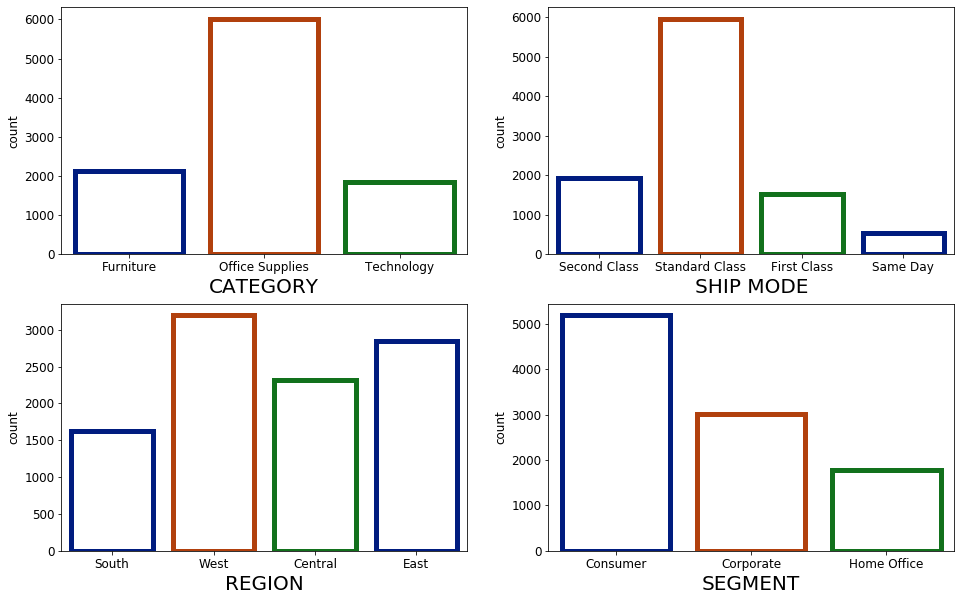

In [29]:
matplotlib.rcParams['font.size']=12                    #http://web.stanford.edu/~ymkhan/blog/2015/matplotlib_change_default_font/
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
s1=sns.countplot(x='Category',data=retailnew_df,linewidth=5,facecolor=(0,0,0,0),
                   edgecolor=sns.color_palette("dark", 3))
s1.set_xlabel('CATEGORY',fontsize=20)
plt.subplot(2,2,2)
s2=sns.countplot(x='Ship_Mode',data=retailnew_df,linewidth=5,facecolor=(0,0,0,0),
                   edgecolor=sns.color_palette("dark", 3))
s2.set_xlabel('SHIP MODE',fontsize=20)
plt.subplot(2,2,3)
s3=sns.countplot(x='Region',data=retailnew_df,linewidth=5,facecolor=(0,0,0,0),
                   edgecolor=sns.color_palette("dark", 3))
s3.set_xlabel('REGION',fontsize=20)
plt.subplot(2,2,4)
s4=sns.countplot(x='Segment',data=retailnew_df,linewidth=5,facecolor=(0,0,0,0),
                   edgecolor=sns.color_palette("dark", 3))
s4.set_xlabel('SEGMENT',fontsize=20)

In [30]:
retail_df.describe()

,Postal_Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [31]:
retailnew_df.drop('Postal_Code',axis='columns',inplace=True)   #to remove Postal Code attribute.

In [32]:
retailnew_df['Discount_rate']=(retailnew_df.Discount*100)

In [33]:
retailnew_df['Profit_margin']=((retailnew_df.Profit/retailnew_df.Sales)*100)

In [34]:
retailnew_df.describe()

,Sales,Quantity,Discount,Profit,Discount_rate,Profit_margin
count,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000,9977.000000
mean,230.148902,3.790719,0.156278,28.69013,15.627844,12.011354
std,623.721409,2.226657,0.206455,234.45784,20.645520,46.663769
min,0.444000,1.000000,0.000000,-6599.97800,0.000000,-275.000000
25%,17.300000,2.000000,0.000000,1.72620,0.000000,7.500000
50%,54.816000,3.000000,0.200000,8.67100,20.000000,27.000000
75%,209.970000,5.000000,0.200000,29.37200,20.000000,36.250000
max,22638.480000,14.000000,0.800000,8399.97600,80.000000,50.000000


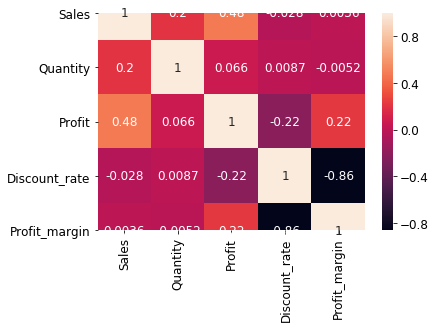

In [35]:
d=retailnew_df.drop('Discount',axis='columns',inplace=False)      #dropping Discount column just for now to get better view of heatmap
df_corr=d.corr()
sns.heatmap(df_corr,xticklabels=df_corr.columns,yticklabels=df_corr.columns,annot=True)

# Do offering more discounts for products results in more Sales of the same or offering no Discount how it effects Sales?

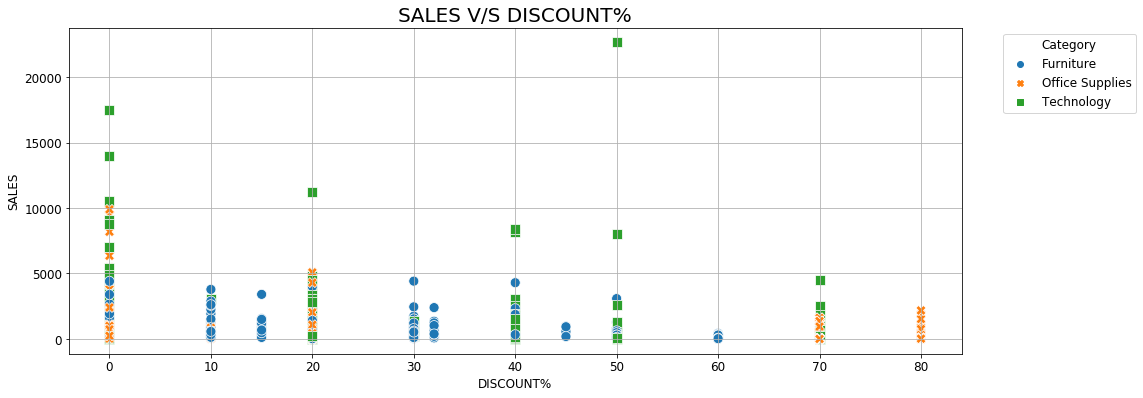

In [36]:
plt.figure(figsize=(16,6))
s1=sns.scatterplot(y='Sales', x='Discount_rate' ,hue='Category',data=retailnew_df,style='Category',s=100)
s1.set_xlabel('DISCOUNT%',fontsize=12)
s1.set_ylabel('SALES',fontsize=12)
s1.set_title('SALES V/S DISCOUNT%',fontsize=20)
plt.grid()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")   #Shifting legend outside graph

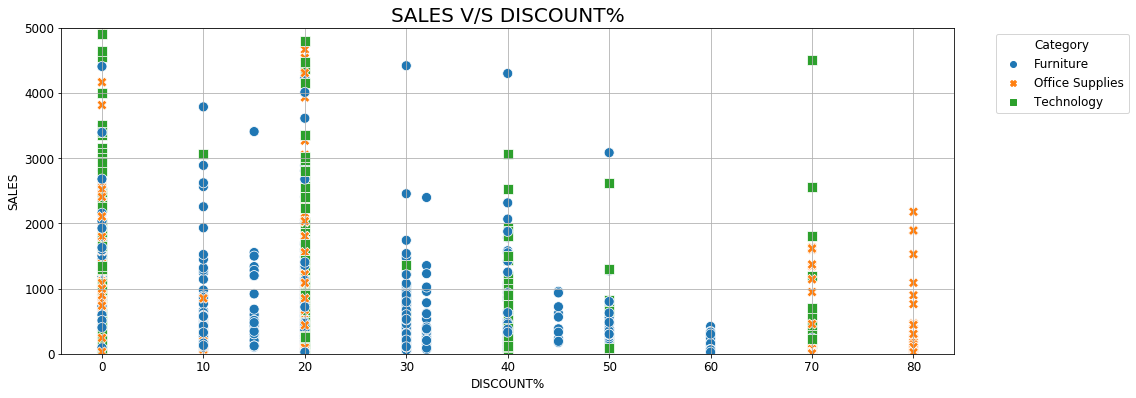

In [37]:
plt.figure(figsize=(16,6))
s1=sns.scatterplot(y='Sales', x='Discount_rate' ,hue='Category',data=retailnew_df,style='Category',s=100)
plt.ylim([0,5000])
s1.set_xlabel('DISCOUNT%',fontsize=12)
s1.set_ylabel('SALES',fontsize=12)
s1.set_title('SALES V/S DISCOUNT%',fontsize=20)
plt.grid()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

Text(0.5, 1.0, 'DISCOUNT V/S NET PROFIT TO SALES RATIO ')

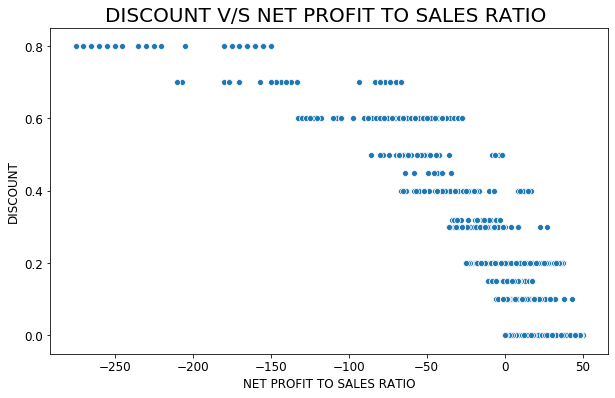

In [38]:
plt.figure(figsize=(10,6))
s1=sns.scatterplot(x='Profit_margin',y='Discount',data=retailnew_df)
s1.set_xlabel('NET PROFIT TO SALES RATIO')
s1.set_ylabel('DISCOUNT')
s1.set_title('DISCOUNT V/S NET PROFIT TO SALES RATIO ',fontsize=20)

In [39]:
Discount_greater_50=retailnew_df[retailnew_df['Discount_rate']>=50]              #Sub-Category offering more than 50% Discount

In [40]:
Discount_greater_50['Sub_Category'].unique()


array(['Appliances', 'Binders', 'Bookcases', 'Furnishings', 'Tables',
       'Machines'], dtype=object)

# Which Sub-Category mostly has more than 50% Discount rate?

Text(0.5, 0, 'Total Count')

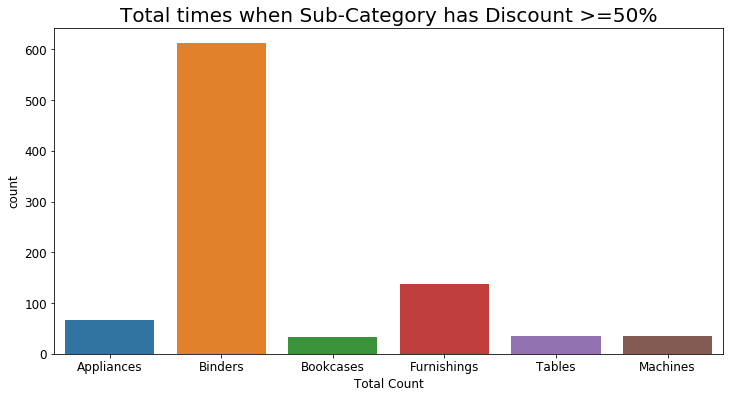

In [41]:
plt.figure(figsize=(12,6))
s1=sns.countplot(data=Discount_greater_50,x='Sub_Category')
s1.set_title('Total times when Sub-Category has Discount >=50%',fontsize=20)
s1.set_xlabel('Total Count')

# Which is the most popular products among customers

Text(0.5, 0, 'Sub-Category')

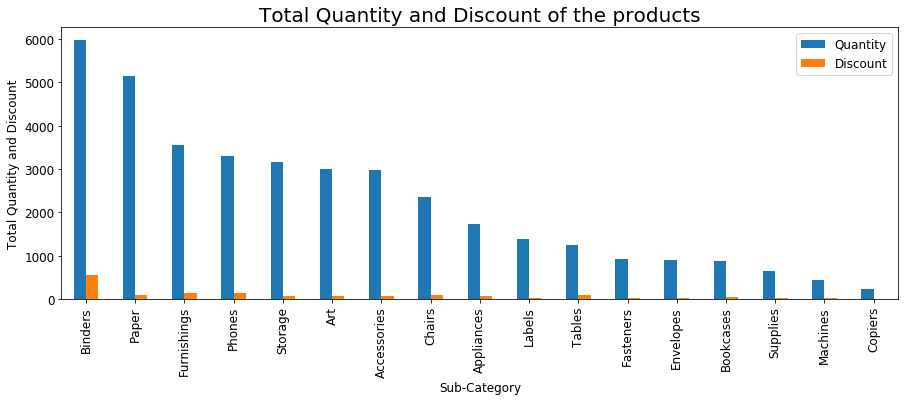

In [43]:
total_Quantity = retailnew_df.groupby('Sub_Category')['Quantity','Discount'].sum().sort_values('Quantity',ascending = False).plot(kind='bar',figsize = (15, 5)) 
plt.title('Total Quantity and Discount of the products',fontsize=20)
plt.ylabel('Total Quantity and Discount',fontsize=12)
plt.xlabel('Sub-Category',fontsize=12)

# Which sub-Category has highest and lowest total Sales and profit?

Text(0.5, 0, 'Sub-Category')

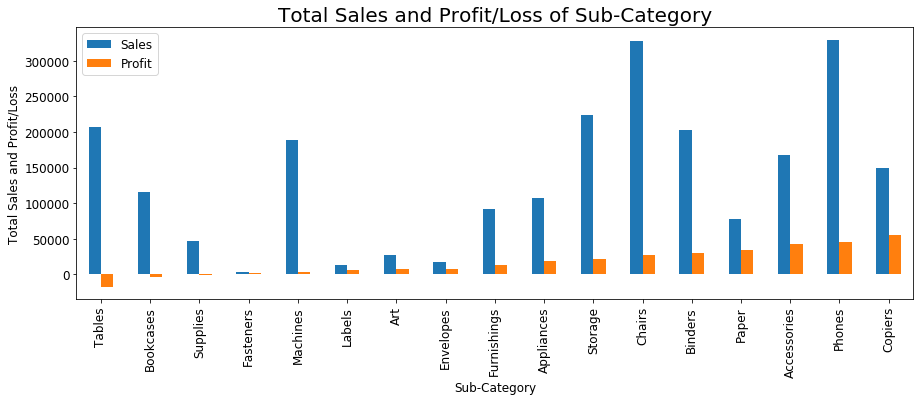

In [44]:
df_SubCategories = retailnew_df.groupby(['Sub_Category'])[['Sales', 'Profit']].sum()   #Defining new dataframe with columns Sales,Discount,Profit according to Sub-Category
df_SubCategories.sort_values('Profit', ascending = True)[['Sales', 'Profit']].plot(kind = 'bar',
                                                                             figsize = (15, 5))
plt.title('Total Sales and Profit/Loss of Sub-Category',fontsize=20)
plt.ylabel('Total Sales and Profit/Loss',fontsize=12)
plt.xlabel('Sub-Category',fontsize=12)

In [45]:
retailnew_df['Selling_Price_per_unit']=retailnew_df.Sales/retailnew_df.Quantity

In [46]:
df_SubCategories1=retailnew_df.groupby('Sub_Category')[['Selling_Price_per_unit','Discount_rate']].mean()

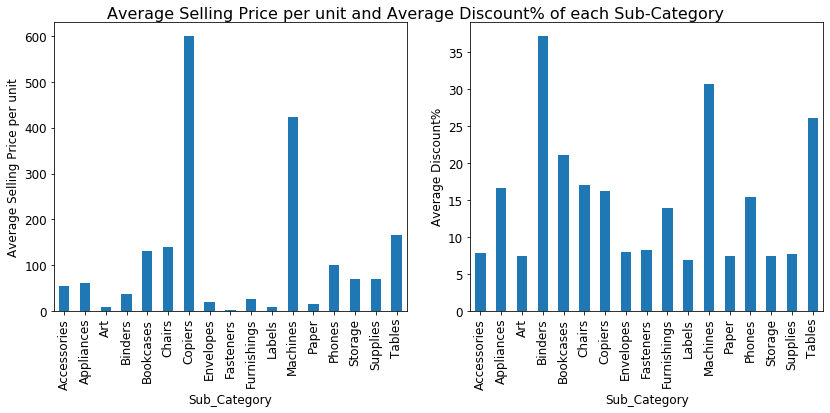

In [47]:
plt.suptitle('Average Selling Price per unit and Average Discount% of each Sub-Category',fontsize='16')
plt.subplot(1,2,1)
df_SubCategories1['Selling_Price_per_unit'].plot(kind = 'bar',figsize=(12,6))  
plt.ylabel('Average Selling Price per unit')                                                                          
plt.subplot(1,2,2)
df_SubCategories1['Discount_rate'].plot(kind = 'bar',figsize=(12,6))   
plt.ylabel('Average Discount%')  
plt.tight_layout(pad=2)


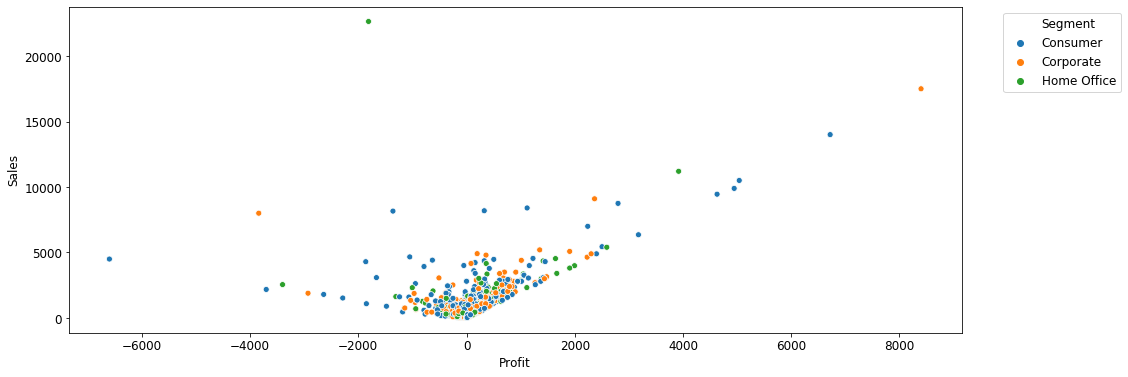

In [48]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Profit',y='Sales',data=retailnew_df,hue='Segment')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")   #Shifting legend outside graph

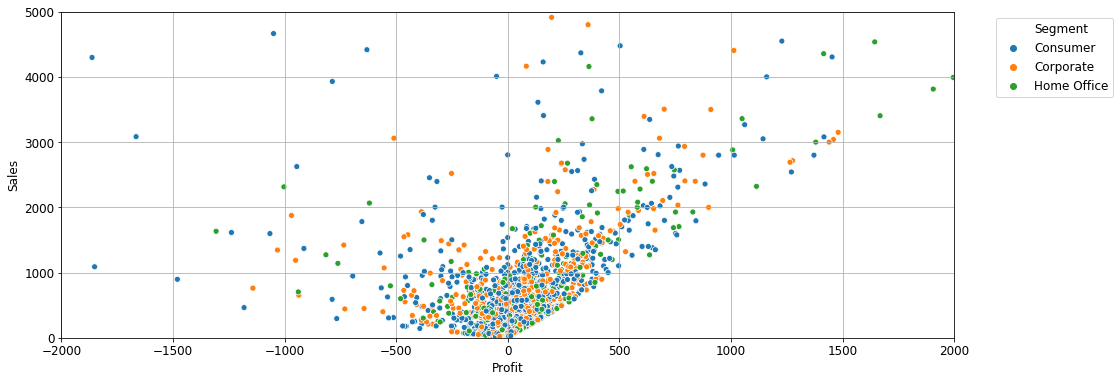

In [49]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Profit',y='Sales',data=retailnew_df,hue='Segment')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")   #Shifting legend outside graph
plt.ylim([0,5000])
plt.xlim([-2000,2000])
plt.grid()


# Which segment results mostly in negative profit?

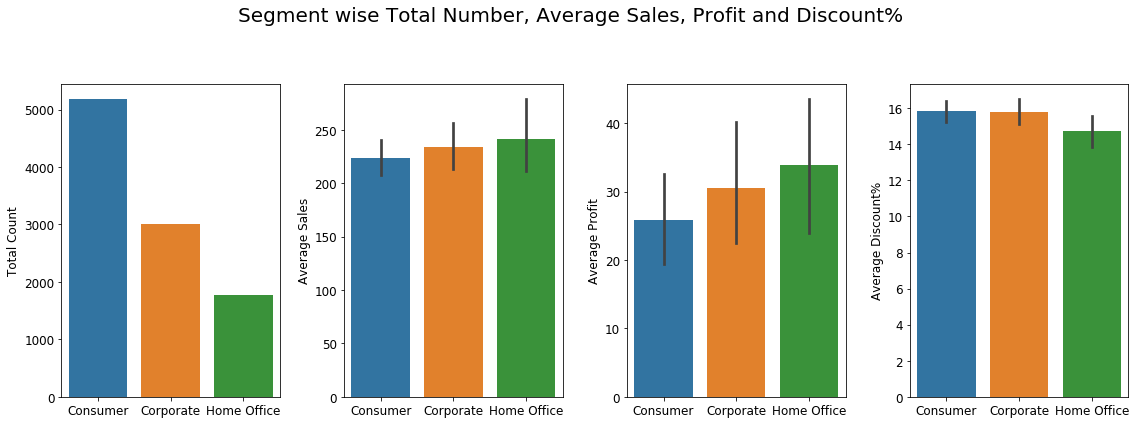

In [50]:
fig, ax = plt.subplots(1,4, figsize=(16, 6))
fig.suptitle('Segment wise Total Number, Average Sales, Profit and Discount%',fontsize='20')     #Setting Main Title
s1=sns.countplot(x='Segment',data=retailnew_df,ax=ax[0])
s1.set(xlabel=None)
s1.set(ylabel='Total Count')
s2=sns.barplot(x='Segment',y='Sales',data=retailnew_df,ax=ax[1])
s2.set(xlabel=None)
s2.set(ylabel='Average Sales')
s3=sns.barplot(x='Segment',y='Profit',data=retailnew_df,ax=ax[2])
s3.set(xlabel=None)
s3.set(ylabel='Average Profit')
s4=sns.barplot(x='Segment',y='Discount_rate',data=retailnew_df,ax=ax[3])
s4.set(xlabel=None)
s4.set(ylabel='Average Discount%')
fig.tight_layout()                  #https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
fig.subplots_adjust(top=0.8)       #(To adjust Main title so it don't overlap with rest graphs)
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

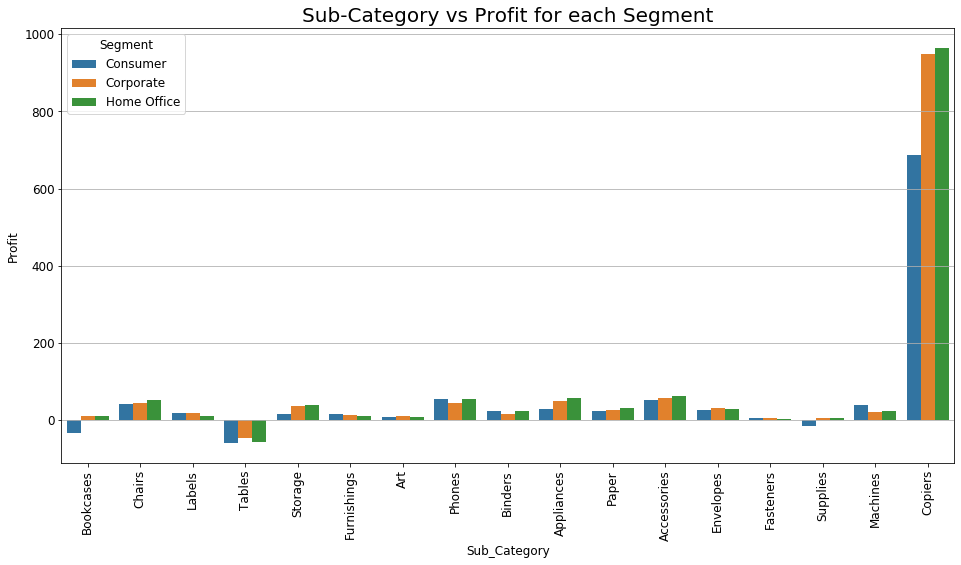

In [51]:
plt.figure(figsize=(16,8))
sns.barplot(x='Sub_Category',y='Profit',data=retailnew_df,ci=None,hue='Segment');
plt.title('Sub-Category vs Profit for each Segment',fontsize=20)
plt.grid(axis='y')
plt.xticks(rotation=90)

# How sales or profit depends on Region wise or state wise?

Text(0.5, 1.0, 'Region wise Average Sales, Profit and Discount%')

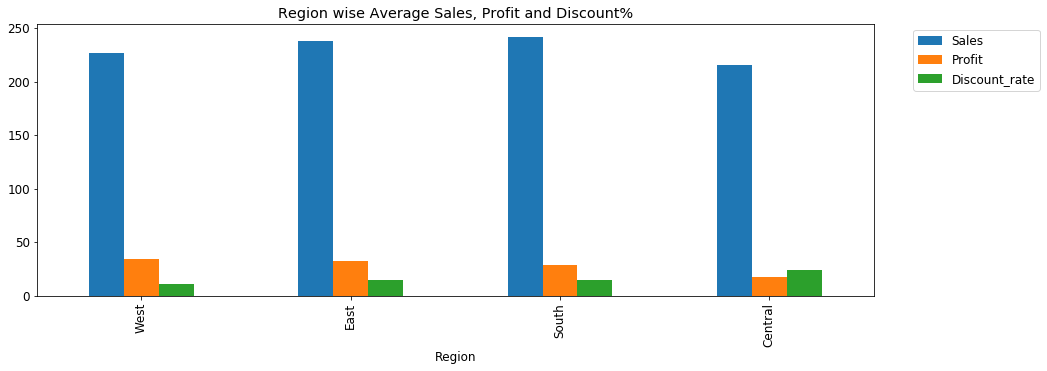

In [52]:
df_region= retailnew_df.groupby(['Region'])[['Sales', 'Discount_rate', 'Profit']].mean()
df_region.sort_values('Profit', ascending = False)[['Sales', 'Profit','Discount_rate']].plot(kind = 'bar',
                                                                              figsize = (15, 5))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")   #Shifting legend outside graph
plt.title('Region wise Average Sales, Profit and Discount%')

In [53]:
Central_region_df=retailnew_df[retailnew_df.Region=='Central'][['State','City','Sales','Profit','Discount_rate',]].sort_values('Sales',ascending=False)

In [54]:
Central_region_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2319 entries, 6826 to 4101
Data columns (total 5 columns):
State            2319 non-null object
City             2319 non-null object
Sales            2319 non-null float64
Profit           2319 non-null float64
Discount_rate    2319 non-null float64
dtypes: float64(3), object(2)
memory usage: 108.7+ KB


In [55]:
Central_region_df.nunique()

State              13
City              181
Sales            1917
Profit           2074
Discount_rate       9
dtype: int64

Text(0.5, 0, 'Central States')

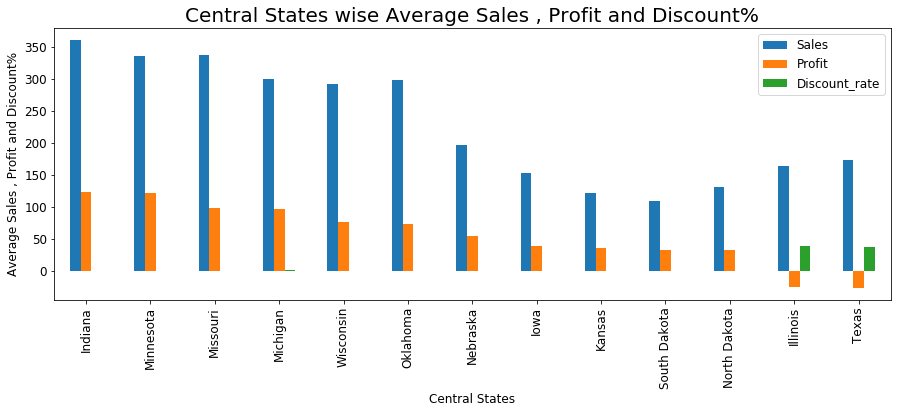

In [56]:
df_CentralCity=Central_region_df.groupby(['State'])[['Sales','Profit','Discount_rate']].mean()
df_CentralCity.sort_values('Profit', ascending = False)[['Sales', 'Profit','Discount_rate']].plot(kind = 'bar',
                                                                              figsize = (15, 5))
plt.title('Central States wise Average Sales , Profit and Discount%',fontsize=20)
plt.ylabel('Average Sales , Profit and Discount%',fontsize=12)
plt.xlabel('Central States',fontsize=12)

# Is there any difference whether discount is present or not?¶

In [57]:
No_Discount_df=retailnew_df[retailnew_df['Discount']==0]
No_Discount_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4787 entries, 0 to 9993
Data columns (total 15 columns):
Ship_Mode                 4787 non-null object
Segment                   4787 non-null object
Country                   4787 non-null object
City                      4787 non-null object
State                     4787 non-null object
Region                    4787 non-null object
Category                  4787 non-null object
Sub_Category              4787 non-null object
Sales                     4787 non-null float64
Quantity                  4787 non-null int64
Discount                  4787 non-null float64
Profit                    4787 non-null float64
Discount_rate             4787 non-null float64
Profit_margin             4787 non-null float64
Selling_Price_per_unit    4787 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 598.4+ KB


In [58]:
Discount_df=retailnew_df[retailnew_df['Discount']>0]

Text(0.5, 48.0, 'Sales')

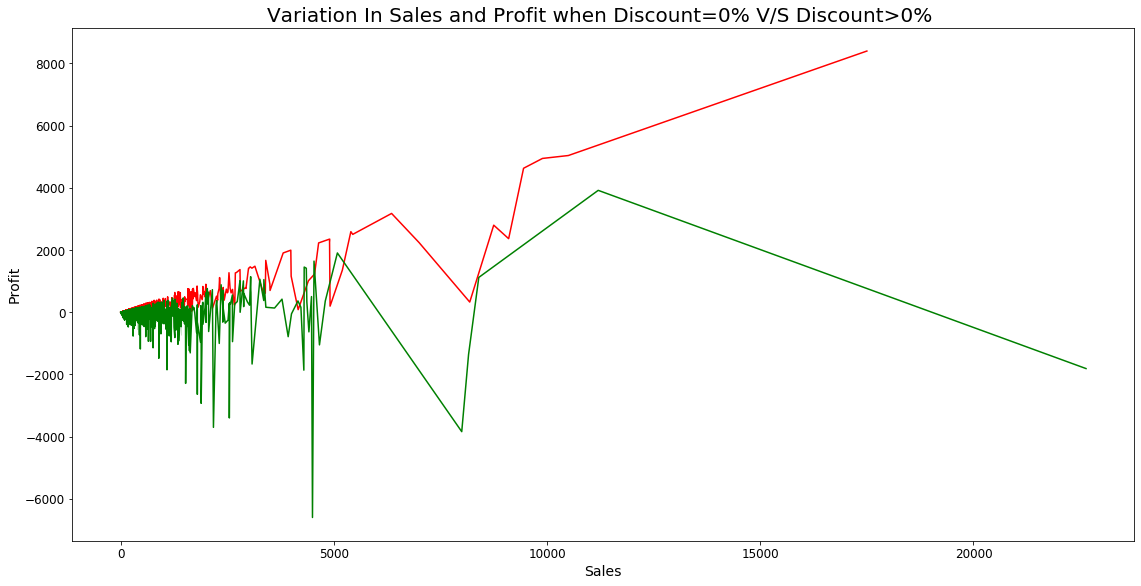

In [59]:

plt.figure(figsize=(16,8))
sns.lineplot(x='Sales',y='Profit',data=No_Discount_df, color="r")
sns.lineplot(x='Sales',y='Profit',data=Discount_df, color="g")
plt.tight_layout()
plt.title('Variation In Sales and Profit when Discount=0% V/S Discount>0% ',fontsize=20)
plt.ylabel('Profit',fontsize=14)
plt.xlabel('Sales',fontsize=14)

In [60]:
State_df=retailnew_df.groupby('State')[['Sales','Profit','Discount']].sum()

Text(0.5, 0, 'State')

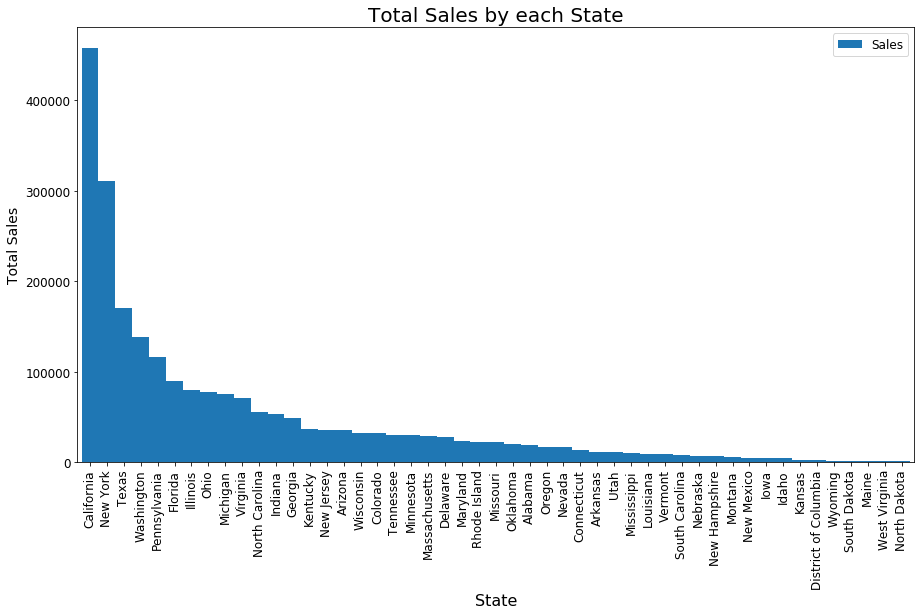

In [61]:
State_df.sort_values('Sales', ascending = False)[['Sales']].plot(kind = 'bar',width=1,figsize=(15,8))
plt.title('Total Sales by each State',fontsize=20)
plt.ylabel('Total Sales',fontsize=14)
plt.xlabel('State',fontsize=16)

Text(0.5, 0, 'State')

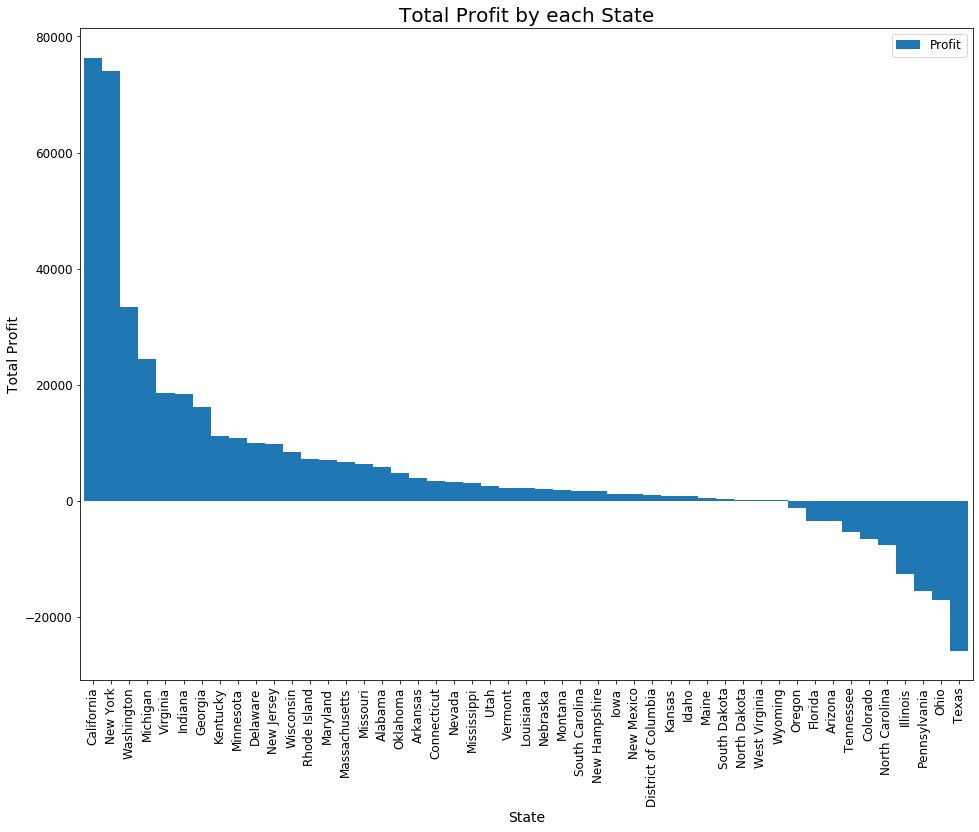

In [62]:
State_df.sort_values('Profit', ascending = False)[['Profit']].plot(kind = 'bar',width=1,figsize=(16,12))
plt.title('Total Profit by each State',fontsize='20')
plt.ylabel('Total Profit',fontsize=14)
plt.xlabel('State',fontsize=14)

Text(0.5, 0, 'State')

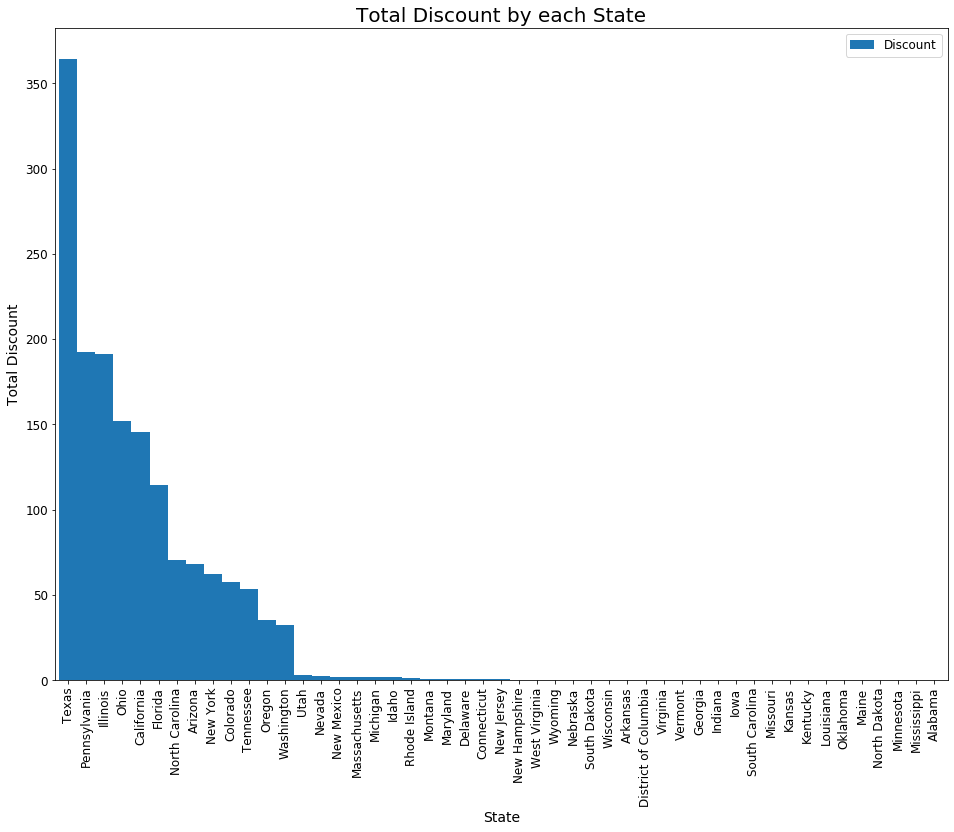

In [63]:
State_df.sort_values('Discount', ascending = False)[['Discount']].plot(kind = 'bar',width=1,figsize=(16,12))
plt.title('Total Discount by each State',fontsize='20')
plt.ylabel('Total Discount',fontsize=14)
plt.xlabel('State',fontsize=14)

In [64]:
Texas_City_df=retailnew_df[retailnew_df.State=='Texas'][['City','Sales','Profit','Discount_rate','Ship_Mode',]].sort_values('Sales',ascending=False)

Text(0.5, 0, 'Texas Cities')

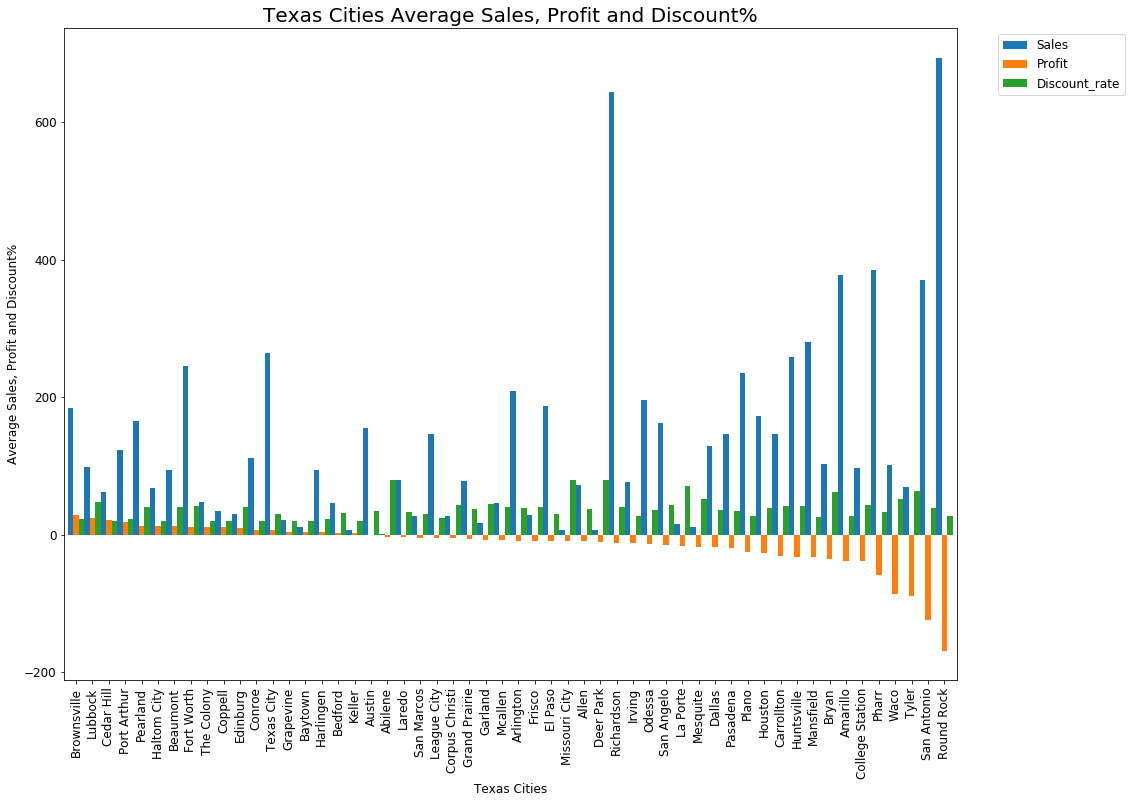

In [65]:
Texas_City_df=Texas_City_df.groupby(['City'])[['Sales','Profit','Discount_rate']].mean()
Texas_City_df.sort_values('Profit', ascending = False)[['Sales', 'Profit','Discount_rate']].plot(kind = 'bar',width=1,figsize=(16,12))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left") 
plt.title('Texas Cities Average Sales, Profit and Discount%',fontsize=20)
plt.ylabel('Average Sales, Profit and Discount%',fontsize=12)
plt.xlabel('Texas Cities',fontsize=12)

In [66]:
low_profit_df=retailnew_df[retailnew_df.Profit_margin<0][['State','Profit_margin','Ship_Mode','Segment','Discount','Category','Sub_Category','Sales','City','Profit']].sort_values('Profit_margin',ascending=False)

In [67]:
low_profit_df['State'].unique()

array(['New York', 'California', 'Texas', 'Tennessee', 'Washington',
       'Pennsylvania', 'Arizona', 'Florida', 'Illinois', 'Ohio',
       'Colorado', 'Oregon', 'North Carolina', 'Rhode Island',
       'Connecticut', 'Maryland', 'Massachusetts', 'New Hampshire',
       'West Virginia', 'New Jersey', 'Delaware', 'Nevada', 'New Mexico'],
      dtype=object)

In [68]:
low_profit_df['Sub_Category'].unique()

array(['Chairs', 'Bookcases', 'Storage', 'Accessories', 'Tables',
       'Machines', 'Furnishings', 'Phones', 'Supplies', 'Fasteners',
       'Binders', 'Appliances'], dtype=object)

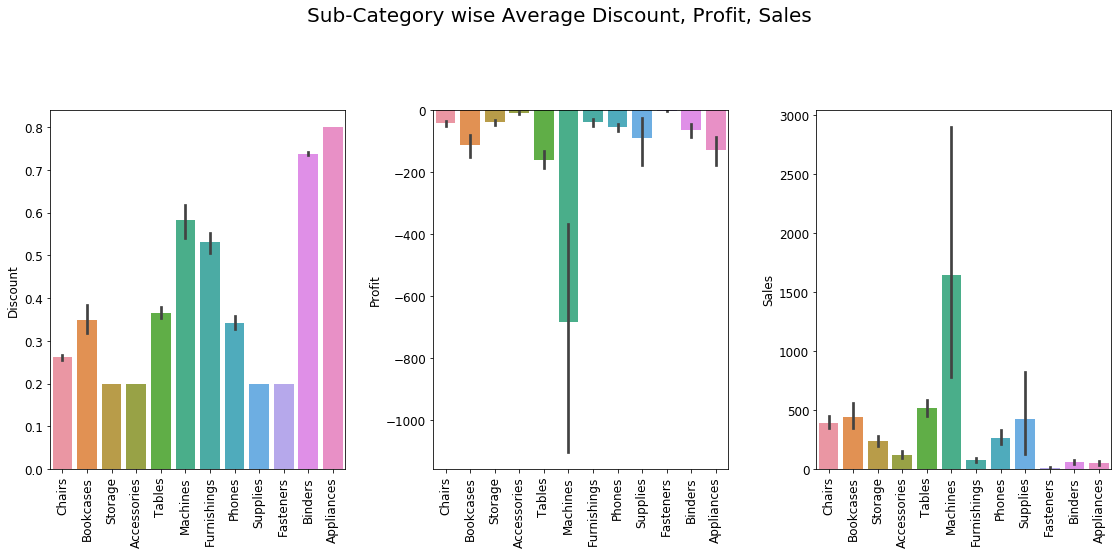

In [70]:
fig,ax=plt.subplots(1,3,figsize=(16,8))
fig.suptitle('Sub-Category wise Average Discount, Profit, Sales',fontsize=20)
s1=sns.barplot(x='Sub_Category',y='Discount',data=low_profit_df,ax=ax[0])
s1.set(xlabel=None)
s1.set_xticklabels(labels=['Chairs','Bookcases','Storage','Accessories','Tables','Machines',
       'Furnishings', 'Phones','Supplies','Fasteners','Binders', 'Appliances'
       ],rotation=90)
s1.set(ylabel='Discount')
s2=sns.barplot(x='Sub_Category',y='Profit',data=low_profit_df,ax=ax[1])
s2.set_xticklabels(labels=['Chairs','Bookcases','Storage','Accessories','Tables','Machines',
       'Furnishings', 'Phones','Supplies','Fasteners','Binders', 'Appliances'
       ],rotation=90)
s2.set(xlabel=None)
s2.set(ylabel='Profit')
s3=sns.barplot(x='Sub_Category',y='Sales',data=low_profit_df,ax=ax[2])
s3.set_xticklabels(labels=['Chairs','Bookcases','Storage','Accessories','Tables','Machines',
       'Furnishings', 'Phones','Supplies','Fasteners','Binders', 'Appliances'
       ],rotation=90)
s3.set(xlabel=None)
s3.set(ylabel='Sales')
plt.tight_layout(pad=2)
fig.subplots_adjust(top=0.8)

# Which Discount rate draws more attention of Customers?
To calculate this inference first let us see how many times individual Discount has appeared

In [71]:
df=retailnew_df['Discount_rate'].value_counts() 
df1=df.to_frame()             #for Conversing Series into Dataframe
df1.rename(columns={'Discount_rate':'Total_Count'}, inplace=True)

In [72]:
df1


,Total_Count
0.0,4787
20.0,3653
70.0,418
80.0,299
30.0,226
40.0,206
60.0,138
10.0,94
50.0,66
15.0,52


In [73]:
df2=retailnew_df.groupby('Discount_rate')[['Quantity']].sum()
df2.rename(columns={'Quantity':'Total_Quantity'}, inplace=True)

In [74]:
df2

,Total_Quantity
Discount_rate,
0.0,18230
10.0,373
15.0,198
20.0,13649
30.0,847
32.0,105
40.0,786
45.0,45
50.0,241


In [75]:
ratio_df=df2.Total_Quantity/df1.Total_Count
ratio_df1=ratio_df.to_frame()

In [76]:
ratio_df1.rename(columns={0:'Ratio'}, inplace=True)

In [77]:
ratio_df1.reset_index(level=0, inplace=True)
ratio_df1.rename(columns={'index':'Discount_rate'}, inplace=True)

In [78]:
ratio_df1

,Discount_rate,Ratio
0,0.0,3.808231
1,10.0,3.968085
2,15.0,3.807692
3,20.0,3.736381
4,30.0,3.747788
5,32.0,3.888889
6,40.0,3.815534
7,45.0,4.090909
8,50.0,3.651515
9,60.0,3.630435


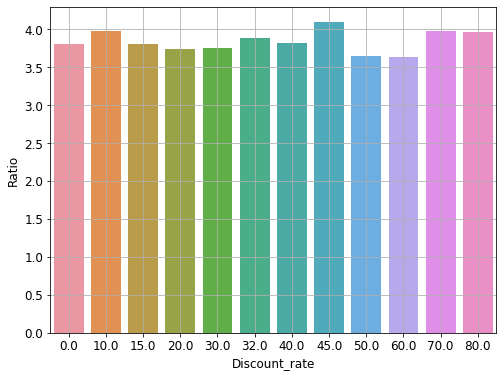

In [79]:
plt.figure(figsize=(8,6))
sns.barplot(x='Discount_rate',y='Ratio',data=ratio_df1)
plt.grid()

In [ ]:

CONCLUSIONS AND INFERENCES
Offering Discount is one of the incentives of drawing more Customers which is true for this data as with Discounted product it resulted in highest Sales though it has inverse impact on Profit for the Business.
Texas State is third highest and first highest when represented against Total Sales and Total Discount respectively and is the bottom most State when represented against Total Profit made.
Machines and Phones gain more profit in Consumer Segment.Chairs, Accessories, Appliances, Copiers gain more profit in Home Office Segment. Envelops, Labels gain more profit in Corporate segment Consumer segment.Thus, companies can be more oriented to target more particular audience for thier product.
Binders is most popular among customers and lowest selling price and highest Discount%, though offering Discounts definitely draw more Customers but on which Discount% is highest can be make lower in order it doesn't effect Sales and gain more Profit.
THANK YOU